<a href="https://colab.research.google.com/github/DarianSawali/Computer-Vision-Project-Overview/blob/main/computer_vision_yolo_augmented1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')


In [ ]:
!pip3 install -q ultralytics opencv-python
import ultralytics
ultralytics.checks()


Ultralytics 8.3.218 🚀 Python-3.13.7 torch-2.9.0 CPU (Apple M4)
Setup complete ✅ (10 CPUs, 16.0 GB RAM, 101.5/460.4 GB disk)


In [ ]:
from pathlib import Path
import yaml

data_yaml = Path.home() / "Downloads" / "TACO dataset.v1i.yolov8" / "data.yaml"
print("YAML exists:", data_yaml.exists(), "\nPath:", data_yaml)

with open(data_yaml, "r") as f:
    y = yaml.safe_load(f)

print("nc:", y.get("nc"))
print("names:", y.get("names"))

YAML exists: True 
Path: /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/data.yaml
nc: 6
names: ['cardboard', 'glass', 'metal', 'other', 'paper', 'plastic']


In [ ]:
from ultralytics import YOLO
import torch

device = "mps" if torch.backends.mps.is_available() else "cpu"
print("Using device:", device)

Using device: mps


In [ ]:
model = YOLO("yolov8n.pt")

results = model.train(
    data=str(data_yaml),
    epochs=8,
    imgsz=512,
    batch=8,
    workers=0,
    patience=5,
    device=device
)

New https://pypi.org/project/ultralytics/8.3.221 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.218 🚀 Python-3.13.7 torch-2.9.0 MPS (Apple M4)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=8, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=

In [ ]:
model = YOLO("yolov8s.pt")

results = model.train(
    data=str(data_yaml),
    epochs=10,
    patience=5,
    imgsz=480,
    batch=8,
    device="mps",
    workers=4,
    project="runs/detect",
    name="train_aug_s640_10e",

    # Augmentation
    augment=True,
    hsv_h=0.02,
    hsv_s=0.7,
    hsv_v=0.4,
    fliplr=0.5,
    flipud=0.05,
    degrees=5.0,
    translate=0.08,
    scale=0.5,
    shear=2.0,
    perspective=0.0005,
    mosaic=1.0,
    close_mosaic=10,
    mixup=0.1,
    copy_paste=0.3,
    erasing=0.5,

    # Optimizer & scheduler
    optimizer="AdamW",
    lr0=0.0025,
    lrf=0.01,
    cos_lr=True,
    warmup_epochs=2.0,
    weight_decay=0.0005,

    # Eval
    max_det=100,
)

print("Training done. Results saved to:", results.save_dir)

New https://pypi.org/project/ultralytics/8.3.223 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.218 🚀 Python-3.13.7 torch-2.9.0 MPS (Apple M4)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.3, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/data.yaml, degrees=5.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.5, exist_ok=False, fliplr=0.5, flipud=0.05, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.02, hsv_s=0.7, hsv_v=0.4, imgsz=480, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0025, lrf=0.01, mask_ratio=4, max_det=100, mixup=0.1, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_aug_s640_10e3

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("/Users/darianaxelsawali/runs/detect/train_aug_s640_10e3/weights/best.pt")


results = model.val(
    data="/Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/data.yaml",
    split="val",
    imgsz=480,
    device="mps",
    plots=True
)

print("Curves regenerated. Check:", results.save_dir)


Ultralytics 8.3.218 🚀 Python-3.13.7 torch-2.9.0 MPS (Apple M4)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1956.6±192.0 MB/s, size: 1943.5 KB)
val: Scanning /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/labels.cache... 199 images, 4 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 199/199 332.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 0.2it/s 1:03
                   all        199        357       0.44      0.238     0.0872     0.0478
             cardboard         15         18      0.099      0.222     0.0657     0.0406
                 glass         14         26          1          0     0.0177     0.0095
                 metal         39         79      0.257      0.519      0.203      0.113
                 other         11         12          1          0     0.0106    0.00608
                 paper 

In [ ]:
from pathlib import Path

RUN_DIR = Path("runs/detect/train_aug_s640_10e3")
WEIGHTS = RUN_DIR / "weights" / "best.pt"

DATA_YAML = Path("/Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/data.yaml")

print("Run dir exists:", RUN_DIR.exists())
print("Best weights exist:", WEIGHTS.exists())
print("Data YAML exists:", DATA_YAML.exists())


Run dir exists: True
Best weights exist: True
Data YAML exists: True


In [ ]:
from pathlib import Path
import shutil

run_dir = Path("runs/detect/train_aug_s640_10e3")
export_dir = Path("/Users/darianaxelsawali/Desktop/YOLO_Augmented_Export")
export_dir.mkdir(parents=True, exist_ok=True)

for fname in ["confusion_matrix.png", "BoxPR_curve.png", "BoxF1_curve.png", "results.png"]:
    src = run_dir / fname
    if src.exists():
        shutil.copy(src, export_dir / fname)
        print("Exported:", export_dir / fname)
    else:
        print("Missing:", src)



Exported: /Users/darianaxelsawali/Desktop/YOLO_Augmented_Export/confusion_matrix.png
Exported: /Users/darianaxelsawali/Desktop/YOLO_Augmented_Export/BoxPR_curve.png
Exported: /Users/darianaxelsawali/Desktop/YOLO_Augmented_Export/BoxF1_curve.png
Exported: /Users/darianaxelsawali/Desktop/YOLO_Augmented_Export/results.png


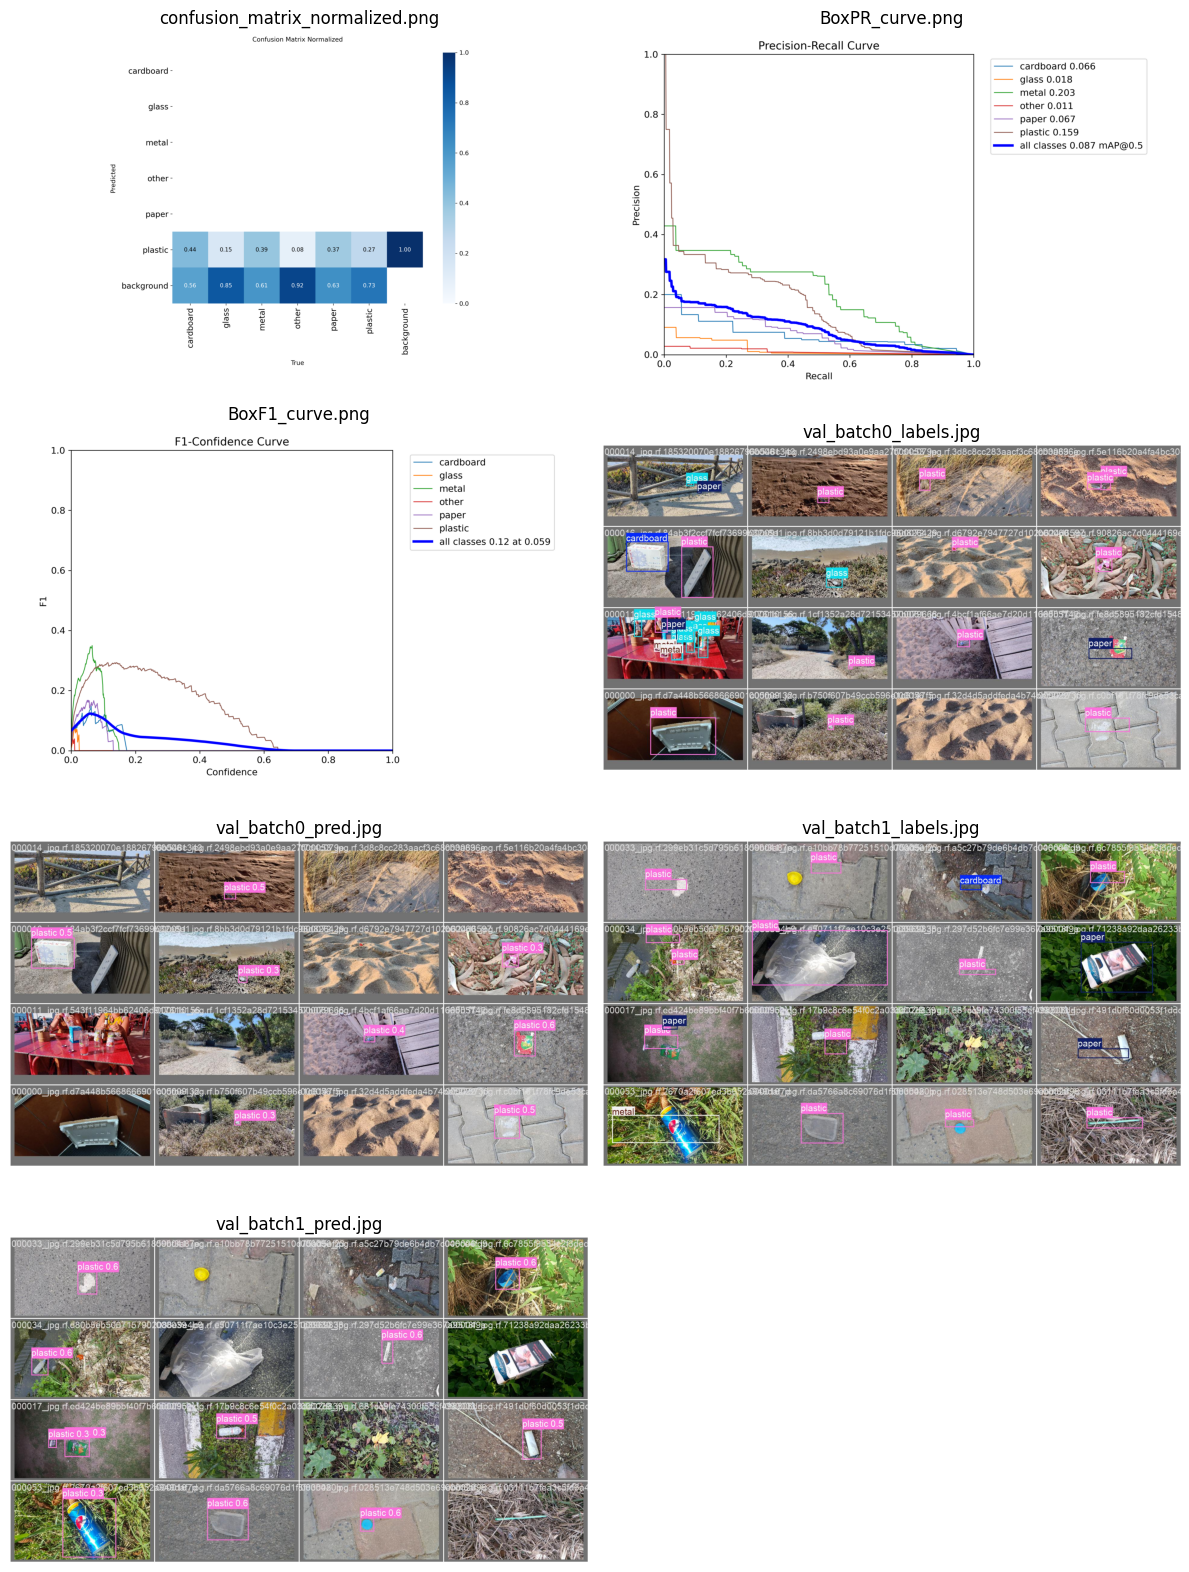

In [ ]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

export = Path("/Users/darianaxelsawali/Desktop/YOLO_Augmented_Export")

to_show = [
    "confusion_matrix_normalized.png",
    "BoxPR_curve.png",
    "BoxF1_curve.png",
    "val_batch0_labels.jpg", "val_batch0_pred.jpg",
    "val_batch1_labels.jpg", "val_batch1_pred.jpg",
]
existing = [export/f for f in to_show if (export/f).exists()]
cols = 2
rows = (len(existing) + 1) // 2

plt.figure(figsize=(12, rows*4))
for i, p in enumerate(existing, 1):
    plt.subplot(rows, cols, i)
    plt.imshow(Image.open(p).convert("RGB"))
    plt.title(p.name)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
from ultralytics import YOLO
from pathlib import Path

weights = "runs/detect/train_aug_s640_10e3/weights/best.pt"
model = YOLO(weights)

img_src = "/Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/images"
for c in [0.15, 0.25, 0.35]:
    name = f"val_preds_conf{int(c*100)}"
    preds = model.predict(
        source=img_src,
        imgsz=480,
        conf=c,
        iou=0.6,
        max_det=100,
        device="mps",
        save=True,
        project="runs/preds",
        name=name
    )
    print("Saved:", preds[0].save_dir)



image 1/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/images/000000_JPG.rf.3ea0602baa7b341ebd5cba44d32ec453.jpg: 480x384 1 plastic, 4712.5ms
image 2/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/images/000000_jpg.rf.239416263fc44e304fad0f1f21bbeb47.jpg: 384x480 2 plastics, 4383.4ms
image 3/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/images/000000_jpg.rf.785c52fe2311d0fd19da7a7894d5b5d6.jpg: 384x480 1 plastic, 396.5ms
image 4/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/images/000000_jpg.rf.d7a448b5668666901c05fbe1325dfc5a.jpg: 224x480 1 plastic, 4547.6ms
image 5/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/images/000001_JPG.rf.01b5c9a848b153df9f2df2f9c6ce21ad.jpg: 480x384 3 plastics, 508.9ms
image 6/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/images/000002_jpg.rf.846b02ab844804f8a299e5eb56b75829.jpg: 384x480 (no detections), 45.8ms
image 7/199 /User

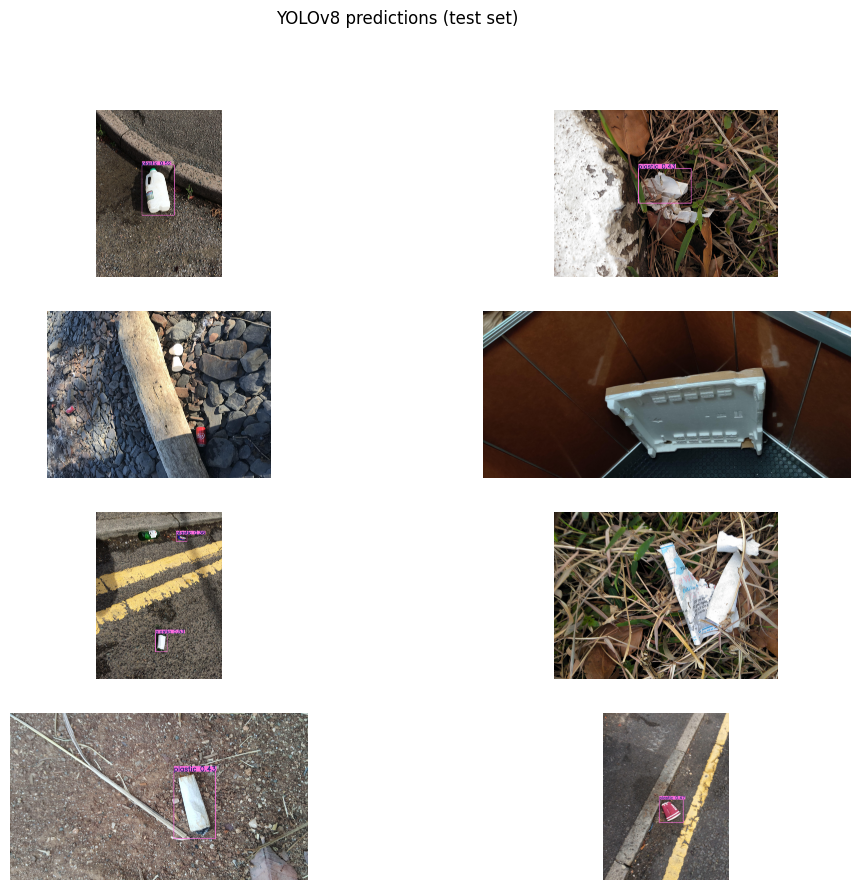

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

viz = Path("runs/preds/val_preds_conf35")
imgs = sorted(viz.glob("*.*"))[:8]
plt.figure(figsize=(12, 10))
for i,p in enumerate(imgs,1):
    plt.subplot(4,2,i); plt.imshow(Image.open(p)); plt.axis("off")
plt.suptitle("YOLOv8 predictions (test set)")
plt.show()


Export dir: /Users/darianaxelsawali/Desktop/YOLO_Augmented_Export exists: True


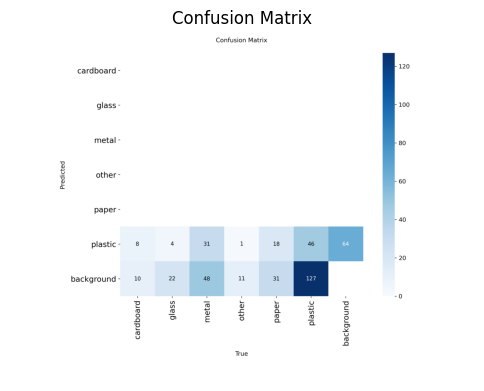

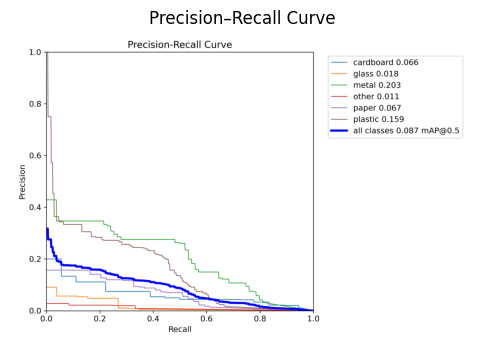

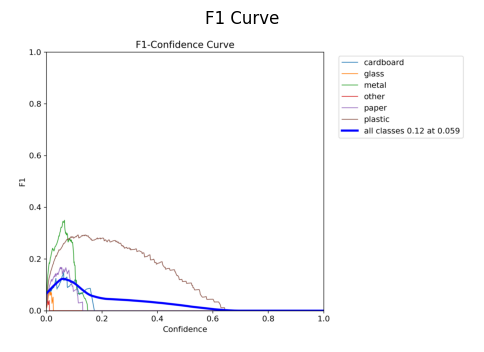

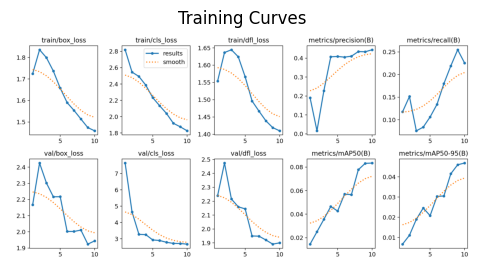

In [ ]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

export_dir = Path.cwd() / "Desktop" / "YOLO_Augmented_Export"
print("Export dir:", export_dir, "exists:", export_dir.exists())

for name, title in [
    ("confusion_matrix.png", "Confusion Matrix"),
    ("BoxPR_curve.png", "Precision–Recall Curve"),
    ("BoxF1_curve.png", "F1 Curve"),
    ("results.png", "Training Curves"),
]:
    p = export_dir / name
    if p.exists():
        plt.figure(figsize=(6,6))
        plt.imshow(Image.open(p).convert("RGB")); plt.axis("off"); plt.title(title)
        plt.show()
    else:
        print("Not found:", p)


In [ ]:
import shutil
from pathlib import Path

src = Path("/Users/darianaxelsawali/runs")
dst = Path("/Users/darianaxelsawali/Desktop/YOLO_Runs_Backup_Augmented1")
shutil.copytree(src, dst, dirs_exist_ok=True)
print("Copied to:", dst)


Copied to: /Users/darianaxelsawali/Desktop/YOLO_Runs_Backup_Augmented1
